### 文本数据预处理
使用jieba分词，Word2Vec词向量分析

In [1]:
# -*- coding: utf-8 -*-
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.feature_extraction import text
from sklearn import decomposition, ensemble
from sklearn.naive_bayes import MultinomialNB
from keras import layers, models, optimizers
from gensim.models import Word2Vec

import pandas as pd
import numpy as np
import string, jieba, re, os, sys
import logging

Using TensorFlow backend.


In [133]:
# Extract content of truth
Df_text_True = pd.read_json("Dataset/text_modal/truth.json", lines=True)
Df_text_False = pd.read_json("Dataset/text_modal/rumor.json", lines=True)
Df_text = Df_text_True.content.append(Df_text_False.decision)
# Df_text = pd.concat([Df_text_True.content, Df_text_False.decision], axis=1, sort=False)
print(Df_text.head())

0    \n\t\t傻逼媒体//【济宁学院男生因分手问题将女友捅死 两人均19岁】 http://t...
1    \n\t\t正在图书馆一惊一乍的看这些恐怖电影解析，突然听到图书管理员跟男盆友打电话说济宁学...
2    \n\t\t发表了博文《铁路部门“指尖餐厅”旅客赞不绝口》旅客乘坐高铁就餐更方便啦!日前，上...
3    \n\t\t发表了博文《清明小长假期间长三角铁路预计日均发送旅客200万人》3月19日至4月...
4    \n\t\t发表了博文《原创微小说+++他走了》他发来微信说，他走了，走到哪里算哪里，他真心...
dtype: object


In [115]:
# 多线程分词
jieba.enable_parallel()

#加载自定义词典
# jieba.load_userdict("F:/baike_spider/dict/baike_word_chinese")

#加载停用词
def getStopwords():
    stopwords = []
    with open("Dataset/stop_word_zh.txt", "r", encoding='utf8') as f:
        lines = f.readlines()
        for line in lines:
            stopwords.append(line.strip())
    return stopwords
stopwords = getStopwords()

In [117]:
# Word2Vec word embedding
content_seg = []
sentence_seg = []
stopwords = getStopwords()
# r1 = '[a-zA-Z0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~（\\n \t·]+—'

output = open('content_seg.txt', 'w', encoding='utf-8')
texts_num = 0
with open('content_seg.txt', 'r', encoding='utf-8') as content:
    for i, content in enumerate(Df_text):
        content = content.strip()
        content = ''.join(re.findall('[\u4e00-\u9fa5]', content))
#         print(content)
        content_temp = jieba.cut(content) # word embedding

        for word in content_temp:
            if word not in stopwords:
                output.write(word + ' ')
        texts_num += 1
        if texts_num % 1000 == 0:
            logging.info("已完成前 %d 行的分词" % texts_num)
output.close()


2019-05-13 19:43:55,965 : INFO : 已完成前 10000 行的分词


In [135]:
# Sntlst = open('Sntlst.txt', 'w', encoding='utf-8')
# with open('Sntlst.txt', 'r', encoding='utf-8') as content:
#     for i, content in enumerate(Df_text):
#         content = content.strip()
#         content = ''.join(re.findall('[\u4e00-\u9fa5]', content))
# #         print(content)
#         content_temp = jieba.cut(content) # word embedding
#         for word in content_temp:
#             if word not in stopwords:
#                 Sntlst.write(word + ' ')
#         Sntlst.write('\n')

In [124]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

model = Word2Vec(sentences, min_count=1)
model.save("med250.model.bin")

2019-05-13 19:46:39,234 : INFO : collecting all words and their counts
2019-05-13 19:46:39,235 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-13 19:46:39,240 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-13 19:46:39,491 : INFO : collected 59127 word types from a corpus of 655662 raw words and 66 sentences
2019-05-13 19:46:39,494 : INFO : Loading a fresh vocabulary
2019-05-13 19:46:41,118 : INFO : min_count=1 retains 59127 unique words (100% of original 59127, drops 0)
2019-05-13 19:46:41,118 : INFO : min_count=1 leaves 655662 word corpus (100% of original 655662, drops 0)
2019-05-13 19:46:41,293 : INFO : deleting the raw counts dictionary of 59127 items
2019-05-13 19:46:41,295 : INFO : sample=0.001 downsamples 39 most-common words
2019-05-13 19:46:41,296 : INFO : downsampling leaves estimated 559327 word corpus (85.3% of prior 655662)
2019-05-13 19:46:41,423 : INFO : estimated required memory for 59127 words and 100 dim

In [125]:
model = Word2Vec.load("med250.model.bin")
model.wv['图书馆']

2019-05-13 19:50:22,391 : INFO : loading Word2Vec object from med250.model.bin
2019-05-13 19:50:22,392 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-13 19:50:22,823 : INFO : loading wv recursively from med250.model.bin.wv.* with mmap=None
2019-05-13 19:50:22,824 : INFO : setting ignored attribute vectors_norm to None
2019-05-13 19:50:22,824 : INFO : loading vocabulary recursively from med250.model.bin.vocabulary.* with mmap=None
2019-05-13 19:50:22,828 : INFO : loading trainables recursively from med250.model.bin.trainables.* with mmap=None
2019-05-13 19:50:22,829 : INFO : setting ignored attribute cum_table to None
2019-05-13 19:50:22,829 : INFO : loaded med250.model.bin
/Users/jordan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([-0.6790596 , -0.31560704, -0.943874  , -0.05403581,  0.36007807,
        0.01736972, -0.18587866,  0.2864233 , -0.91871876, -0.6318645 ,
        0.23814642, -1.2147559 , -0.73912853, -0.01482066,  0.72067636,
        0.09320169,  0.4415589 ,  0.2738696 , -0.29604954, -0.86363137,
       -0.2200789 , -1.0952791 , -0.20724289,  0.5244837 ,  0.07613034,
       -0.20666145,  0.03223133,  0.293121  ,  0.03739917,  0.22991382,
       -0.71261346, -0.13162144,  0.6013406 , -0.69669   ,  0.05765362,
       -0.04310206,  1.0782849 ,  0.10700408,  0.6123096 ,  0.6365985 ,
       -0.6420387 ,  0.08029342,  0.10079873,  0.2719051 ,  0.8119684 ,
        0.20672202,  0.01061113,  0.14355825,  0.33508074,  0.17718288,
        0.13691038,  0.5490799 , -0.41726378,  0.21909967,  0.44301692,
        0.12604618,  0.9167857 ,  1.1517267 ,  0.58338094,  0.3866572 ,
        0.16936353, -0.3866563 , -1.0769637 ,  0.19698599, -0.57084644,
       -0.15516873, -0.06450102,  0.2589866 , -0.3524402 ,  0.26

In [128]:
print(model.wv.vocab)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



/Users/jordan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


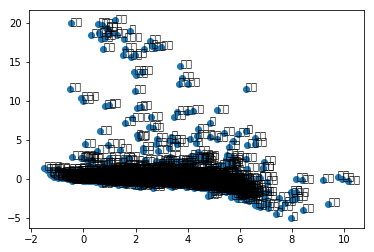

In [130]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
%matplotlib inline
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)

for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:

# Vectorlst = open('Vectorlst.txt', 'w')
# vector_num = 0

# for i, content in enumerate(Df_text):
#     content = content.strip()
#     content = ''.join(re.findall('[\u4e00-\u9fa5]', content))
#     content_temp = jieba.cut(content) # word embedding
#     for word in content_temp:
#         if word not in stopwords:
# #                 Vectorlst.write(model.wv[word])
#             np.savetxt("Vectorlst.txt", model.wv[word])


In [151]:
model.wv["学生"]

array([-0.9836787 , -0.5219107 , -1.5912387 ,  0.02429997,  0.5109194 ,
        0.22154723, -0.8499589 ,  0.3829096 , -1.2320184 , -0.9395975 ,
        0.3346009 , -1.7101276 , -0.3781998 ,  0.33956835,  1.1871411 ,
        0.30968305,  1.2189008 ,  0.28584042, -0.3310823 , -1.3747478 ,
       -0.23842233, -1.9508092 , -0.41056034,  0.674977  , -0.20465769,
       -0.3726541 , -0.08657398,  0.32416913, -0.09273264,  0.25778985,
       -0.7308274 , -0.74352473,  1.114021  , -1.0810578 ,  0.7991874 ,
       -0.03201885,  1.7285317 , -0.82291055,  1.0470022 ,  0.6756084 ,
       -0.787475  ,  0.41010433,  0.4446742 ,  0.3717414 ,  1.2905093 ,
        0.78571707,  0.23662078,  0.4649635 ,  0.3653965 , -0.02825803,
        0.56840116,  1.1776386 , -0.44429007,  0.7402962 ,  0.21772787,
        0.01461117,  1.1463177 ,  1.6631784 ,  0.84194344,  0.8950997 ,
       -0.20602977, -0.8103437 , -2.0034056 ,  0.43925324, -0.9022366 ,
       -0.1547469 , -0.28942162,  0.05503725, -0.7257638 ,  0.66